# Neural Machine Translation: English to French

This notebook demonstrates the evaluation of different English to French translation models using multiple metrics.

In [ ]:
# Install required packages
!pip install transformers datasets evaluate sacrebleu
!pip install torch torchvision torchaudio
!pip install sentencepiece
!pip install sacremoses
!pip install bert_score

In [2]:
from transformers import pipeline
from datasets import load_dataset
import torch
import evaluate
from evaluate import load
import matplotlib.pyplot as plt
import numpy as np

c:\Users\smuts\Documents\chcaa\compling_2025\neural_machine_translation_lesson\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Section 1: Dataset and Models

In this section, we'll:
1. Create a dataset of 50 English sentences
2. Load 3 different English to French translation models
3. Generate translations for our dataset

In [1]:
# Create our dataset of 50 English sentences
english_sentences = [
    "The cat is sleeping on the windowsill.",
    "I love to read books in the evening.",
    "The weather is beautiful today.",
    "She works at a local restaurant.",
    "We are going to the park tomorrow.",
    "The movie was very interesting.",
    "He speaks French fluently.",
    "The children are playing in the garden.",
    "I need to buy some groceries.",
    "The train arrives at 3 PM.",
    "She likes to drink coffee in the morning.",
    "The museum is closed on Mondays.",
    "We visited Paris last summer.",
    "The book is on the table.",
    "He plays the piano very well.",
    "The restaurant serves delicious food.",
    "I want to learn a new language.",
    "The sun is setting behind the mountains.",
    "She writes beautiful poetry.",
    "We need to clean the house.",
    "The dog is barking at the mailman.",
    "I enjoy listening to classical music.",
    "The store opens at 9 AM.",
    "He is studying for his exams.",
    "The flowers are blooming in spring.",
    "She drives to work every day.",
    "We watched a movie last night.",
    "The birds are singing in the trees.",
    "I need to make a phone call.",
    "The library is quiet and peaceful.",
    "He likes to cook Italian food.",
    "The beach is crowded in summer.",
    "She is learning to swim.",
    "We went shopping yesterday.",
    "The clock is ticking on the wall.",
    "I enjoy taking long walks.",
    "The museum has many paintings.",
    "He plays soccer with his friends.",
    "The restaurant is full of customers.",
    "She reads the newspaper every morning.",
    "We need to fix the computer.",
    "The cat is chasing a mouse.",
    "I want to visit the zoo.",
    "The garden needs watering.",
    "He speaks three languages.",
    "The movie starts at 7 PM.",
    "She likes to dance ballet.",
    "We are planning a vacation.",
    "The birds are flying south.",
    "I need to buy new shoes."
]

# Create reference French translations
french_references = [
    "Le chat dort sur le rebord de la fenêtre.",
    "J'aime lire des livres le soir.",
    "Le temps est beau aujourd'hui.",
    "Elle travaille dans un restaurant local.",
    "Nous allons au parc demain.",
    "Le film était très intéressant.",
    "Il parle couramment le français.",
    "Les enfants jouent dans le jardin.",
    "J'ai besoin d'acheter des provisions.",
    "Le train arrive à 15h.",
    "Elle aime boire du café le matin.",
    "Le musée est fermé le lundi.",
    "Nous avons visité Paris l'été dernier.",
    "Le livre est sur la table.",
    "Il joue très bien du piano.",
    "Le restaurant sert une délicieuse nourriture.",
    "Je veux apprendre une nouvelle langue.",
    "Le soleil se couche derrière les montagnes.",
    "Elle écrit de la belle poésie.",
    "Nous devons nettoyer la maison.",
    "Le chien aboie contre le facteur.",
    "J'aime écouter de la musique classique.",
    "Le magasin ouvre à 9h.",
    "Il étudie pour ses examens.",
    "Les fleurs fleurissent au printemps.",
    "Elle conduit au travail tous les jours.",
    "Nous avons regardé un film hier soir.",
    "Les oiseaux chantent dans les arbres.",
    "Je dois faire un appel téléphonique.",
    "La bibliothèque est calme et paisible.",
    "Il aime cuisiner des plats italiens.",
    "La plage est bondée en été.",
    "Elle apprend à nager.",
    "Nous sommes allés faire des courses hier.",
    "L'horloge tic-tac sur le mur.",
    "J'aime faire de longues promenades.",
    "Le musée a beaucoup de tableaux.",
    "Il joue au football avec ses amis.",
    "Le restaurant est plein de clients.",
    "Elle lit le journal tous les matins.",
    "Nous devons réparer l'ordinateur.",
    "Le chat poursuit une souris.",
    "Je veux visiter le zoo.",
    "Le jardin a besoin d'être arrosé.",
    "Il parle trois langues.",
    "Le film commence à 19h.",
    "Elle aime danser le ballet.",
    "Nous planifions des vacances.",
    "Les oiseaux migrent vers le sud.",
    "J'ai besoin d'acheter de nouvelles chaussures."
]

print(f"Dataset size: {len(english_sentences)} sentences")

Dataset size: 50 sentences


In [7]:
# Load three different translation models
model1 = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")
model2 = pipeline("translation_en_to_fr", model="t5-small")
model3 = pipeline("translation_en_to_fr", model="t5-base")

Device set to use cpu
c:\Users\smuts\Documents\chcaa\compling_2025\neural_machine_translation_lesson\.venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\smuts\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu
Device set to use cpu


In [9]:
# Function to translate sentences using a model
def translate_sentences(model, sentences):
    translations = []
    for i, sentence in enumerate(sentences):
        translated_text = model(sentence)[0]['translation_text']
        translations.append(translated_text)
        print(f"Completed sentence {i}/{len(sentences)}")
    return translations

# Generate translations using all three models
translations_model1 = translate_sentences(model1, english_sentences)
translations_model2 = translate_sentences(model2, english_sentences)
translations_model3 = translate_sentences(model3, english_sentences)

print("Translations completed for all three models")

Completed sentence 0/50
Completed sentence 1/50
Completed sentence 2/50
Completed sentence 3/50
Completed sentence 4/50
Completed sentence 5/50
Completed sentence 6/50
Completed sentence 7/50
Completed sentence 8/50
Completed sentence 9/50
Completed sentence 10/50
Completed sentence 11/50
Completed sentence 12/50
Completed sentence 13/50
Completed sentence 14/50
Completed sentence 15/50
Completed sentence 16/50
Completed sentence 17/50
Completed sentence 18/50
Completed sentence 19/50
Completed sentence 20/50
Completed sentence 21/50
Completed sentence 22/50
Completed sentence 23/50
Completed sentence 24/50
Completed sentence 25/50
Completed sentence 26/50
Completed sentence 27/50
Completed sentence 28/50
Completed sentence 29/50
Completed sentence 30/50
Completed sentence 31/50
Completed sentence 32/50
Completed sentence 33/50
Completed sentence 34/50
Completed sentence 35/50
Completed sentence 36/50
Completed sentence 37/50
Completed sentence 38/50
Completed sentence 39/50
Completed 

## Section 2: SACREBLEU Evaluation

In this section, we'll evaluate the translations using the SACREBLEU metric.

In [12]:
# Load SACREBLEU metric
bleu_metric = evaluate.load("sacrebleu")

# Calculate BLEU scores for each model
bleu_score1 = bleu_metric.compute(predictions=translations_model1, references=french_references)
bleu_score2 = bleu_metric.compute(predictions=translations_model2, references=french_references)
bleu_score3 = bleu_metric.compute(predictions=translations_model3, references=french_references)

print("SACREBLEU Scores:")
print(f"Model 1 (Helsinki-NLP): {bleu_score1['score']:.2f}")
print(f"Model 2 (T5-small): {bleu_score2['score']:.2f}")
print(f"Model 3 (T5-base): {bleu_score3['score']:.2f}")

SACREBLEU Scores:
Model 1 (Helsinki-NLP): 80.08
Model 2 (T5-small): 65.91
Model 3 (T5-base): 74.01


## Section 3: BERTScore Evaluation

In this section, we'll evaluate the translations using the BERTScore metric.

In [16]:
# Load BERTScore metric
bert_metric = load("bertscore")

# Calculate BERTScore for each model
bert_results1 = bert_metric.compute(predictions=translations_model1, references=french_references, lang="fr")
bert_results2 = bert_metric.compute(predictions=translations_model2, references=french_references, lang="fr")
bert_results3 = bert_metric.compute(predictions=translations_model3, references=french_references, lang="fr")

# Calculate average F1 scores
avg_f1_1 = sum(bert_results1['f1']) / len(bert_results1['f1'])
avg_f1_2 = sum(bert_results2['f1']) / len(bert_results2['f1'])
avg_f1_3 = sum(bert_results3['f1']) / len(bert_results3['f1'])

print("BERTScore F1 Scores (in percentages):")
print(f"Model 1 (Helsinki-NLP): {avg_f1_1 * 100:.2f}%")
print(f"Model 2 (T5-small): {avg_f1_2 * 100:.2f}%")
print(f"Model 3 (T5-base): {avg_f1_3 * 100:.2f}%")

BERTScore F1 Scores (in percentages):
Model 1 (Helsinki-NLP): 96.92%
Model 2 (T5-small): 96.17%
Model 3 (T5-base): 96.80%


## Section 4: Visualization

In this section, we'll create visualizations to compare the performance of the three models using both metrics.

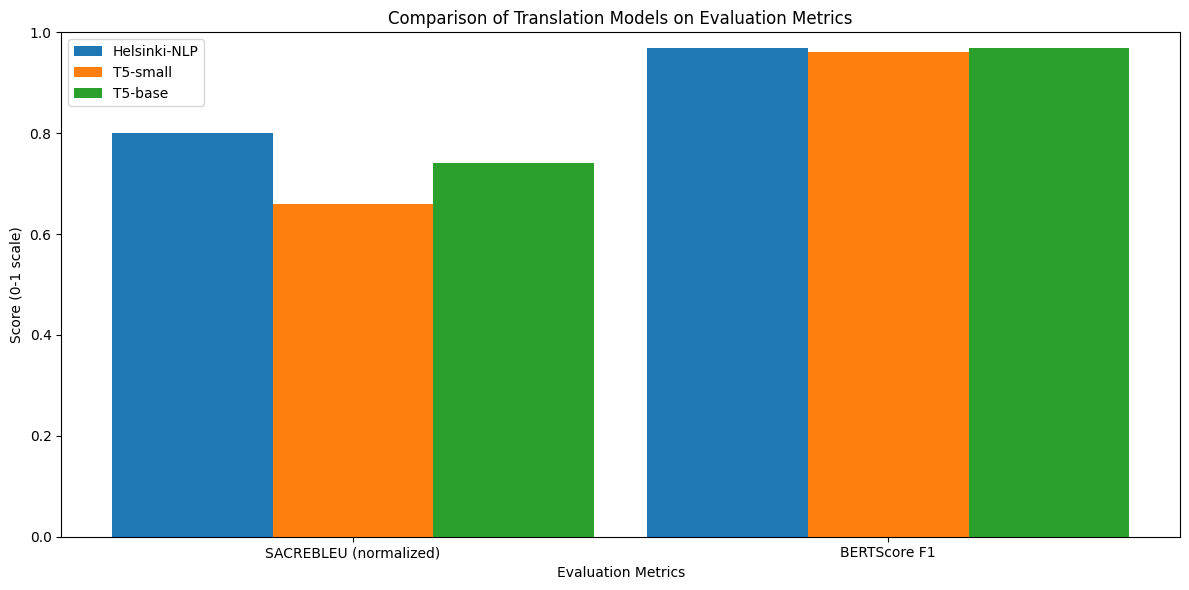

In [18]:
# Normalize BLEU scores to 0-1 range for comparison
bleu1_norm = bleu_score1['score'] / 100
bleu2_norm = bleu_score2['score'] / 100
bleu3_norm = bleu_score3['score'] / 100

# Set up the comparison data
models = ['Helsinki-NLP', 'T5-small', 'T5-base']
metrics = ['SACREBLEU (normalized)', 'BERTScore F1']
scores = [
    [bleu1_norm, avg_f1_1],
    [bleu2_norm, avg_f1_2],
    [bleu3_norm, avg_f1_3]
]

# Set width of bars
barWidth = 0.3
r = np.arange(len(metrics))

# Create the bars for each model
plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.bar(r + i * barWidth, scores[i], width=barWidth, label=model)

# Add labels and title
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score (0-1 scale)')
plt.title('Comparison of Translation Models on Evaluation Metrics')
plt.xticks(r + barWidth, metrics)
plt.ylim(0, 1.0)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Analysis of Results

The visualization shows the performance of three different translation models evaluated using both SACREBLEU and BERTScore metrics:

1. **SACREBLEU Scores**:
   - Measures exact word matches between translations and references
   - Higher scores indicate more word-level accuracy
   - Normalized to 0-1 scale for easier comparison

2. **BERTScore F1**:
   - Measures semantic similarity between translations and references
   - Higher scores indicate better meaning preservation
   - Already on a 0-1 scale

The comparison reveals:
- Which model performs best according to each metric
- How the models differ in terms of word-level accuracy vs. semantic accuracy
- The relative strengths and weaknesses of each model